<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Play-store-App-Review-EDA/blob/main/Play_Store_App_Review_EDA_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

<b>First thing First</b>. 
Let Go through what we are about to do in this Google Colab Notebook.we are about to perform Exploratory Data Analysis(EDA).over a given data set.
<b>EDA</b>


<b>App Store</b>. 
App stores or app marketplaces are digital distribution platforms for mobile and desktop apps. They offer online users a plethora of apps to browse through, purchase or download for free - a concept that is proving increasingly successful around the world. 
Only In 2020, over 218 billion apps were downloaded worldwide and numbers are only going to increase.
DO you know there are 3.15Millions Apps available on Google App store.
and annual number of apps downloaded from Google play store is around 111.3 billion. Now Here comes the important part The gross app revenue of google play worldwide is 47.9 billion USD
And an Average consumer spend on mobile apps per smartphone as of 3rd quarter 2021(in U.S. dollars) 5.13USD.

Application Markets is very deep market to be dive in and take the precious pears out.for that we need users views for that companies use Application Review concept.

https://www.statista.com/topics/1729/app-stores/#dossierKeyfigures

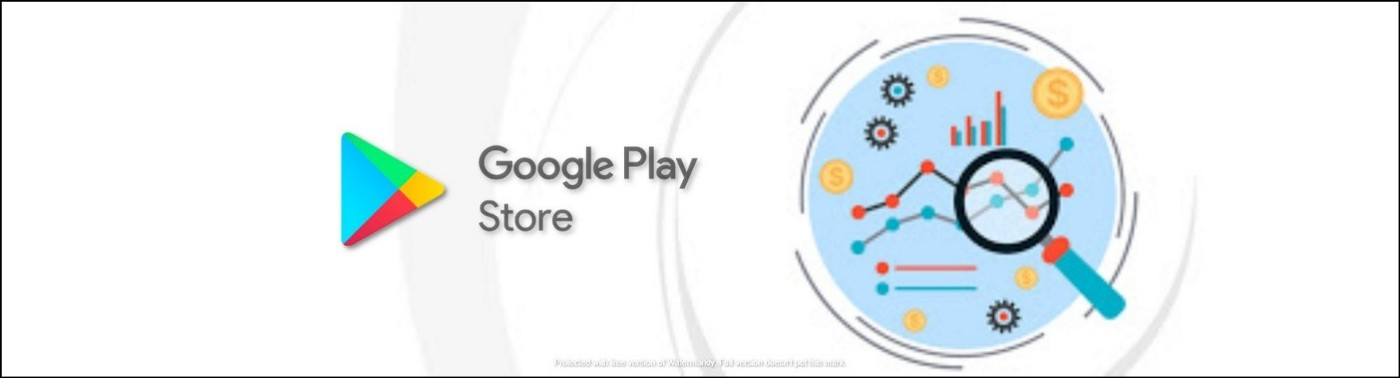

In [ ]:
#Import numpy with alias np
import numpy as np
#Import pandas with alias pd
import pandas as pd
#Import seaborn with alias sns
import seaborn as sns
#Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
File1="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play Store Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play store app User Reviews.csv"

In [ ]:
store_df=pd.read_csv(File1)


In [ ]:
Review_Df=pd.read_csv(File2)

To have a sucess in app making business a team of developers need to work and creat app keeping in mind the two different observations first is creat an app which will people prefer to install and use and use it with satisfaction. and other observation is to create an app with people use it with satisfacion and also ready to pay for the app as there are many apps free in market.

ok Then
lets search for the best conditions for our developers and make our app shine in market.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

<b>Understanding our Data

---



In [ ]:
#Play store app data
store_df.head()


In [ ]:
#Play stor app user Reviews data
Review_Df.head()

<b>Lets have a Top View

In [ ]:
#All columns from play store app data.
print(f"Play store app columns Name:-{store_df.columns}")

Play store app columns Name:-Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [ ]:
#All columns from play store app user Reviews data.
print(f"Play store app user Reviews columns Name:-{Review_Df.columns}")

Play store app user Reviews columns Name:-Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


<b>How big they are 

In [ ]:
#Size of Data freme in terms of total no. of rows and total no. of columns
print(f"(Rows, columns):-{store_df.shape}")

(Rows, columns):-(10841, 13)


In [ ]:
#Size of Data freme in terms of total no. of rows and total no. of columns
print(f"(Rows, Columns):-{Review_Df.shape}")

(Rows, Columns):-(64295, 5)


<b>Dive Deep in it.</b>

lets check the traits of data in columns.

In [ ]:
#Infromation about data in columns from our first dataset(play store app data)
store_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Infromation about data in columns from our second dataset(play store app Reviews data)
Review_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


<b>Dive Deep with clearity</b>

Creat a function that will present the information in datasets with clearity

In [ ]:
#Make a function for detail information about data frame.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type of columns as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements in each columns into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements in each columns into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements in each columns into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info


In [ ]:
#Call the fuction for Detailed information about our first data set.
Detailed_info(store_df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,9660,0,10841
Category,object,34,0,10841
Rating,float64,40,1474,9367
Reviews,object,6002,0,10841
Size,object,462,0,10841
Installs,object,22,0,10841
Type,object,3,1,10840
Price,object,93,0,10841
Content Rating,object,6,1,10840
Genres,object,120,0,10841


outcomes:-
1.we have duplicates inside "App" columns which we dont need.,
2.we have maximum nulls in "Rating" column., 3.we have only "Ratings" in Float type and rest all the columns are availble in string.

In [ ]:
#Lets check what we have in our second dataset
Detailed_info(Review_Df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,1074,0,64295
Translated_Review,object,27994,26868,37427
Sentiment,object,3,26863,37432
Sentiment_Polarity,float64,6195,26863,37432
Sentiment_Subjectivity,float64,4530,26863,37432


outcomes:-1 we have lots of nulls in this data set., 2."sentiment_polarity" and "sentiment-subjectivity" columns are float type and other columns are string types

<b>Create copy of Dataframe</b>:-Instead of operating directly on playstore_data and Review_data,we’ll operate on a copy of the dataframe.

This is often a smart thing to do before we perform a data wrangling technique.

As Fequently we want to test your code to make sure that it works properly before you operate on your data directly.
Also it Give us a power to select only those columns which are most neeeded. as per our motive.

In [333]:
df=store_df.copy()
df1=Review_Df.copy()

we will work on these columns only for now as they can give most important data which we can relate and get insight which we are looking for.

In [334]:
Analyse_App=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Price','Genres', 'Content Rating','Last Updated']
Analyse_sentiment_app=['App', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity']

In [335]:
df=df[Analyse_App]
df1=df1[Analyse_sentiment_app]

#App
<b>Lets Start with our First column "App"</b>

App:- App column have names of different application from play store. First task which we will perform on it is to check for any duplictes in app.And only after further inspection we will decide if duplicates need to be kept or we dont need duplicates in our "App" column.

In [ ]:
#Check total duplicates on "App" column.
print(f"Total duplicate values in App column:",df.duplicated(subset=["App"]).sum())


Total duplicate values in App column: 1181


In [ ]:
#count dulpicates for each Applications
df["App"].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
                                                    ..
EU Flags Live Wallpaper                              1
Best New Ringtones 2018 Free 🔥 For Android™          1
BA SALES                                             1
KFC CZ                                               1
Bricks n Balls                                       1
Name: App, Length: 9660, dtype: int64

In [ ]:
#Call any one App name to check information in duplicates.
df[df["App"]=="8 Ball Pool"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Content Rating,Last Updated
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Sports,Everyone,"July 31, 2018"


Outcome:-These duplicates have same values in all the columns these can manipulate our final result.hence we will drop these duplicates.

In [ ]:
#Drop duplicates from App first data set.
df.drop_duplicates(subset=["App"],inplace=True)

App in Play store app user reviews also have duplicates but we cant judge them using previous criteria here duplicates may have different values as per different usserd sentiments

In [ ]:
#user Review app column dulicates
print("Total Duplicates in App column:-",df1.duplicated(["App"]).sum())

Total Duplicates in App column:- 63221


In [ ]:


# df1.drop_duplicates(subset=["App"],inplace=True)

In [ ]:
#Lets have some insight from numeric data (Play store Data)
df.describe()


,Rating
count,8197.000000
mean,4.175052
std,0.561026
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#Lets have some insight from numeric data (Play store App Review)
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


<b>It seems as we have big mess in the "Rating" columns its seem to have an Outliar.

#Outliars
Rating of any app can only range  from 1 to 5. still we can see there
There is amaximum value of 19.0. This is a outliar.</b>
<b>An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors.</b>
To deal with outliar we have to analyse our data.The analysis for outlier detection is referred to as outlier mining.mining!! yes you heard it right mining it is not the way done with coal field but the concept is same we have digg out where outliars are available in our data and then we have opertions to remove them.
Lets start the hunt for outliars. 



In [2]:
df.boxplot(["Rating"]);
print(df[df.Rating>5].unstack)
plt.grid(False)

NameError: ignored

In [ ]:
df.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Genres                                  February 11, 2018
Content Rating                                        NaN
Last Updated                                       1.0.19
Name: 10472, dtype: object

<b>We got our creepy creature messing our data.</b>

  We have drop this Row with outliar.As this particular row with outliar is useless with all wrong informations.

In [ ]:
df.drop([10472], inplace=True)

<b>Now lets check how Rating looks like

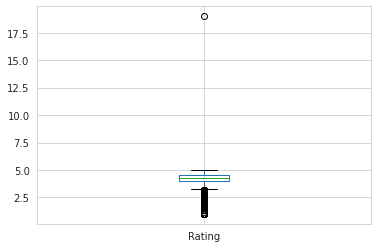

In [ ]:
#check for Rating after droping Outliar
df.boxplot(["Rating"]);

Outcome:-Removed the outliar and saved our data from distortion

<b>lets digout outliars in other data set.

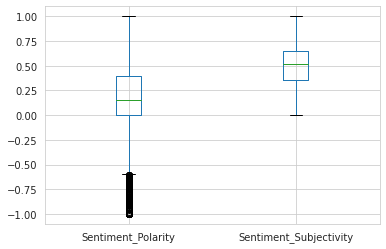

In [ ]:
#Range of values
df1.boxplot();

outcome:-Its is clean for outliar.And values are under range.

#Nulls
<b>Its time to move ahead and hunt down the nulls in our data set.,</b>


In [ ]:
#checking info for further steps to clean 
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,9660,0,9660
Category,object,34,0,9660
Rating,float64,40,1463,8197
Reviews,object,5331,0,9660
Size,object,462,0,9660
Installs,object,22,0,9660
Type,object,3,1,9659
Price,object,93,0,9660
Genres,object,119,0,9660
Content Rating,object,6,1,9659


 We have Nulls in:-
*Rating,Type,*

For the Nulls in Rating lets work on them and try to find if they can be converted to mean median, mode or they also need to droped out.

In [ ]:
#Quick Check for mean, median and mode for "Rating"
df["Rating"].mean()
df["Rating"].median()
# df["Rating"].mode()

4.3

converting to mean,median or mode to  'Rating" can pull the Apps with no Rating to 4 and above. we dont want to take risk for 1463 App data to be manipulate.These can distort our true data. Hence.
sorry "Null in Rating".

In [ ]:
#Drop nulls from "Ratiing"
df.dropna(subset=["Rating"],inplace=True)

In [ ]:
#checking info for further steps to clean second Dataset 
Detailed_info(df1)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,1074,0,64295
Sentiment,object,3,26863,37432
Sentiment_Polarity,float64,6195,26863,37432
Sentiment_Subjectivity,float64,4530,26863,37432


<b>Lots of nulls.</b>The Nulls in Sentiment,sentiment_polarity,sentiment_subjectivity these are not very impressive they can be droped.


In [ ]:
#Drop Nulls from complete Data set 
df1.dropna(inplace=True)

In [ ]:
Detailed_info(df1)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,865,0,37432
Sentiment,object,3,0,37432
Sentiment_Polarity,float64,6195,0,37432
Sentiment_Subjectivity,float64,4530,0,37432


In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,object,5321,0,8196
Size,object,414,0,8196
Installs,object,19,0,8196
Type,object,2,0,8196
Price,object,73,0,8196
Content Rating,object,6,0,8196


#Reviews
Reviews Data should be integer type. but it is available to us in string type.
lets checkwhat all operation we need to performe on them. 

In [ ]:
#Call all the unique elements from Reviews
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [326]:
#convert "Reviews" to int type
# df["Reviews"]=df["Reviews"].astype(int)

In [336]:
df["Reviews"]=df["Reviews"].apply(lambda x:int(x))

ValueError: ignored

In [330]:

Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,412,0,8196
Installs,int64,19,0,8196
Type,object,2,0,8196
Price_in_Dollar,float64,73,0,8196
Genres,object,114,0,8196
Content Rating,object,6,0,8196


outcome:-Converted Reviews Type from string to int type.

#Size
Size is also availabel in string type. we need to check what operation do we need for size.

In [ ]:
#call unique elements from size
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

<b>Size is realy very flilthy need some extract efforts to clean it.</b>

Size in MB and KB is represented as M and K and we also have "Varies with Device" at some points its a tricky task to clean it.lets get our hand dirty.
<b>we are also going to generate some Nulls here.</b>
be prepare for those also.

In [ ]:
#convert "Varies with Device" into "NaN" , Replace other symbols and to change k(KB) into MB convert string with k to float & divide by 1024
df["Size"] = df['Size'].apply(lambda x: str(x).replace('Varies with device',"np.nan") if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
#The k represents KB. convert kB into MB (1024Kb=1Mb) 
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)


In [ ]:
#convert rest all elements also into numeric type.
df["Size"] = df["Size"].apply(pd.to_numeric, errors='coerce')



we have some nulls now Lets check if we can adjust them or there will be any major problem for us using them.

In [ ]:
#Count the nulls in Size
df.Size.isnull().sum()


1169

In [ ]:
#Exploring what change these nulls can create put shaped into mean, median and mode
print("The Mean for Size is:-",df.Size.mean())
print(f"The Median for size is:-{df.Size.median()}")
print(f"The Mode for size is:-{df.Size.mode()}")
print("The max value for size is:",df["Size"].max())
print("The Min. value for Size is:-",df["Size"].min())

The Mean for Size is:- 21.754059911768852
The Median for size is:-13.0
The Mode for size is:-0    14.0
dtype: float64
The max value for size is: 100.0
The Min. value for Size is:- 0.008


ok we can mange you guys(NUlls generated during manipulation).Droping everytime is not good practise as it can end up droping important data available in other features.They can be crucial. Hence if Nulls are managable in such a way that they dont bring reasonable impact in our conclusion then they should be managed.

In [ ]:
#Transform Nulls into median value
df["Size"] = df["Size"].fillna(df["Size"].median())

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,411,0,8196
Installs,object,19,0,8196
Type,object,2,0,8196
Price,object,73,0,8196
Genres,object,114,0,8196
Content Rating,object,6,0,8196


#Installs
Installs column have string with "," in between string and "+"at the end of string.lets manipulate them and convert them to int type



In [ ]:
#lamda fuction to remove last part(+) using .rstrip()
df["Installs"]=df["Installs"].apply(lambda x:x.rstrip("+"))
df["Installs"]= df["Installs"].map(lambda x:x.replace(",",""))


In [ ]:
df["Installs"]=df["Installs"].astype(int)

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,412,0,8196
Installs,int64,19,0,8196
Type,object,2,0,8196
Price,object,73,0,8196
Genres,object,114,0,8196
Content Rating,object,6,0,8196


#Type
It is good to go without any interuptions

In [ ]:
#Call Unique elements
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

#Price
Need some cleaning


In [ ]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

<b>Price string have "$" character and 1 string name"Everyone" in it.convert it to numeric type and change name from price to price in Dollar.

In [ ]:
#Remane Peice to Price_Dolar
df.rename(columns={"Price":"Price_in_Dollar"},inplace=True)


In [ ]:
#Replace Character empty string and word string with NaN.
df["Price_in_Dollar"]= df['Price_in_Dollar'].apply(lambda x: str(x).replace('Everyone',"NAN") if 'Everyone' in str(x) else x)
df["Price_in_Dollar"]=df["Price_in_Dollar"].apply(lambda x: str(x).replace("$", ""))
df["Price_in_Dollar"]=df["Price_in_Dollar"].apply(lambda x: str(x).replace(",", ""))


In [ ]:
#Convert string to numeric
df["Price_in_Dollar"] = df["Price_in_Dollar"].apply(pd.to_numeric, errors='coerce')

In [ ]:
df["Price_in_Dollar"].isnull().sum()

0

In [ ]:
df["Price_in_Dollar"]=df["Price_in_Dollar"].fillna(df["Price_in_Dollar"].median())

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,412,0,8196
Installs,int64,19,0,8196
Type,object,2,0,8196
Price_in_Dollar,float64,73,0,8196
Genres,object,114,0,8196
Content Rating,object,6,0,8196


#Content Rating

In [ ]:
df["Content Rating"].value_counts()

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#Genres

In [ ]:
store_df.Genres.u

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

#Last Updated
Last Update Dates Available in string type.converting it to datetime type. 

In [ ]:
df["Last Updated"].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
df["Last Updated"]=df["Last Updated"].apply(lambda x:pd.to_datetime(x))

#Data Visualization
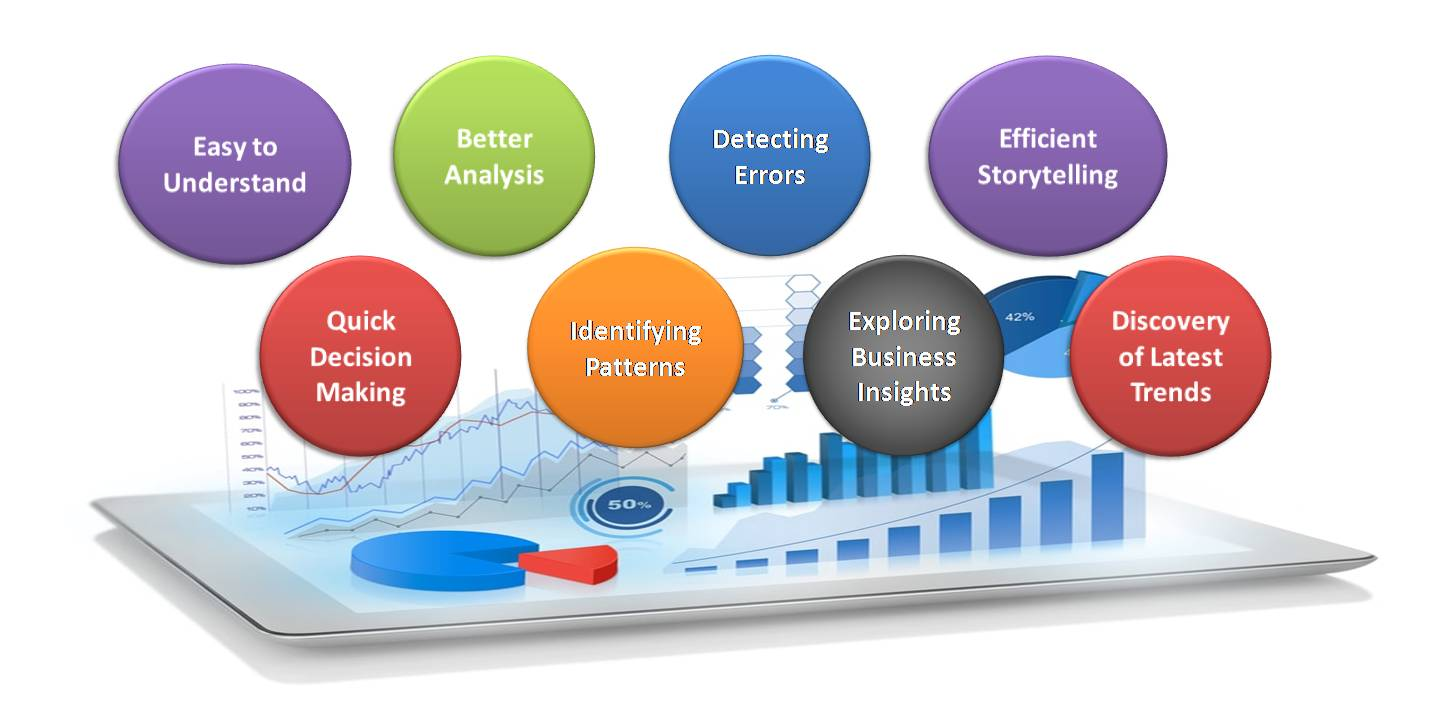

#Q The number of Applications with their respective categories. 

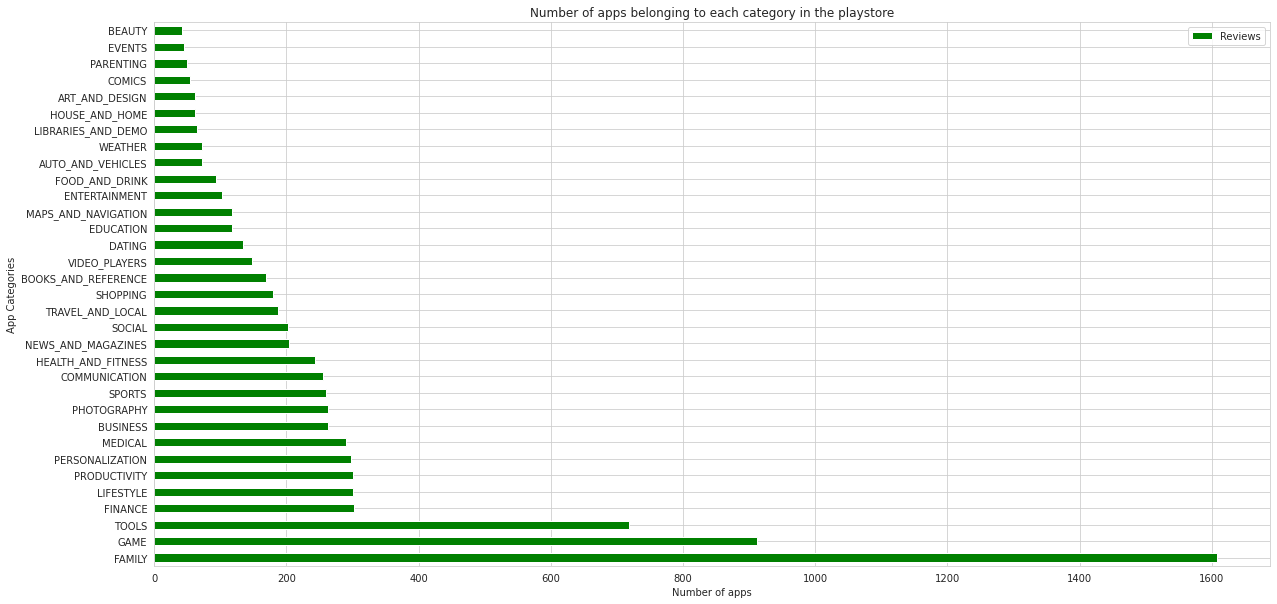

In [308]:

Apps_in_Categories=df.groupby(["Category"]).agg({"Reviews": "count"}).sort_values(by="Reviews",ascending=False)
Apps_in_Categories.plot.barh(figsize = (20,10),color='g')
plt.ylabel('App Categories')
plt.xlabel('Number of apps')
plt.title('Number of apps belonging to each category in the playstore')
plt.legend();



In [1]:
df['Category'].value_counts().plot.barh(figsize=(20,10), color = 'r')
plt.ylabel('App Categories')
plt.xlabel('Number of apps')
plt.title('Number of apps belonging to each category in the playstore')
plt.legend();
plt.grid(False)

NameError: ignored

outcome:-

1.Categories like Family ,Games,Tools have more amount of apps in them.which we need to consider during our final conclusion.

2.There is direct correlation between categories and Reviews

#Correlation between numerical Datatypes in Data set.

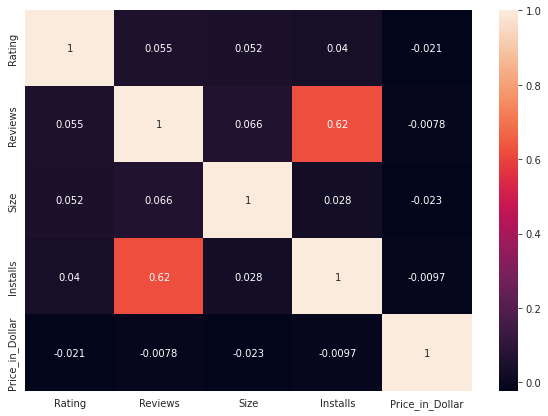

In [313]:
#Fnd if any correlation between any Numerical data type in our first dataset(Play store app data)
df.corr(method ='pearson')
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot= True)

Outcome:-There is major correlation between Installs and Reviews and this is due to the reason that that most no. of users who have installed the app have given Reviews.

Q.calculate Total percentages of free and pais apps in Play store app dataset.

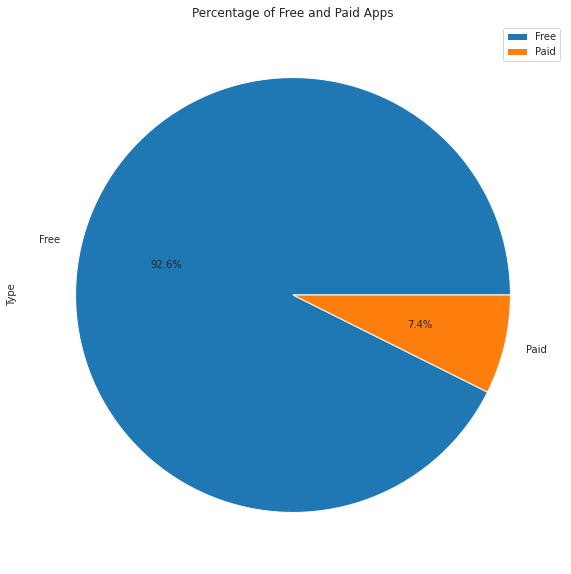

In [319]:
plt.rcParams['figure.figsize']=(10,10)
df["Type"].value_counts().plot.pie( autopct='%1.1f%%');
plt.title("Percentage of Free and Paid Apps");
plt.legend();

outcome:-MAjority of Apps available are for free on play store.

#Q.content Rating 

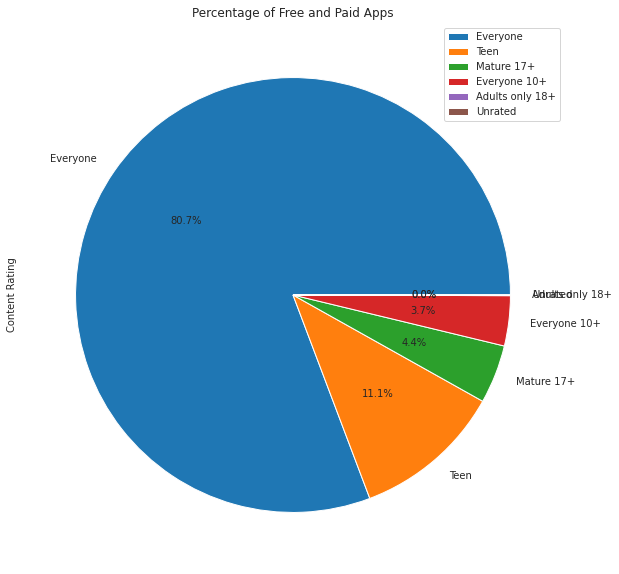

In [320]:
plt.rcParams['figure.figsize']=(10,10)
df["Content Rating"].value_counts().plot.pie( autopct='%1.1f%%');
plt.title("Percentage of Free and Paid Apps");
plt.legend();

1) Which are the Top 10 categories that have most number of Apps and how they are rated by the users?

In [164]:
Top10_Categories = df.groupby('Category').agg({"App": "count","Rating": "median","Installs":"median"}).reset_index().sort_values(by='App',ascending=False).head(10)
Top10_Categories.

,Category,App,Rating,Installs
11,FAMILY,1608,4.3,100000
14,GAME,912,4.3,1000000
29,TOOLS,718,4.2,100000
12,FINANCE,302,4.3,50000
18,LIFESTYLE,301,4.2,50000
25,PRODUCTIVITY,301,4.3,500000
23,PERSONALIZATION,298,4.4,100000
20,MEDICAL,290,4.3,10000
4,BUSINESS,263,4.2,10000
24,PHOTOGRAPHY,263,4.3,1000000


let have a look What Graph says about category vs Installs

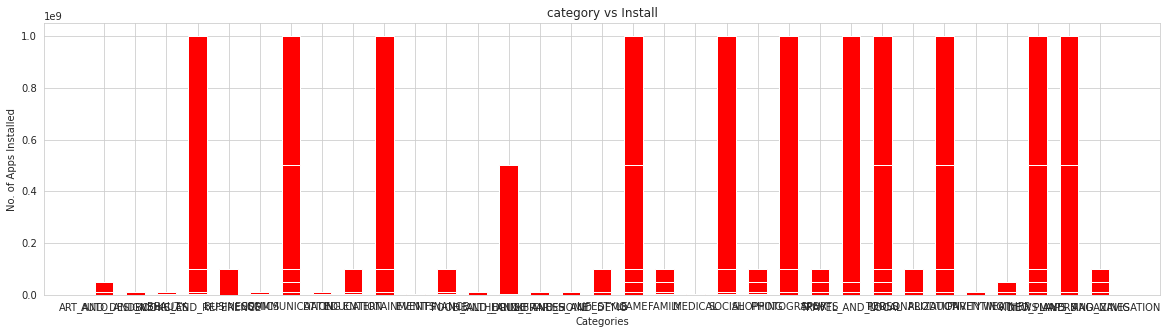

In [323]:
ax = plt.subplots(figsize=(20,5))
plt.bar(df.Category, df.Installs,color="r",width=0.6);
# plt.xticks(rotation=90);
plt.xlabel("Categories")
plt.ylabel("No. of Apps Installed")
plt.title("category vs Install")
plt.show()

#Q. How many categories have paid Apps?
we can develop apps with highest paid categories and made them available to users at some minimum price.

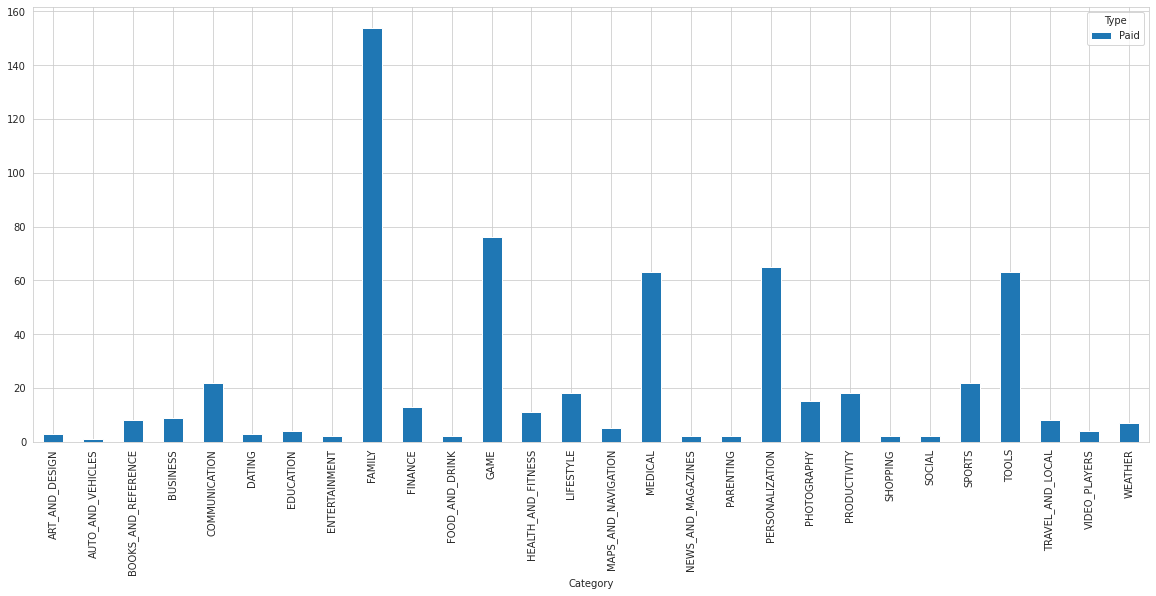

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
groups = df.groupby(['Category',df['Type'].loc[lambda x:x=="Paid"]]).size().unstack(fill_value=0).plot.bar()
# groups.plot.bar()
# x=df.groupby(["Type","Category"])
# x.first()

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,411,0,8196
Installs,int64,19,0,8196
Type,object,2,0,8196
Price_in_Dollar,float64,73,0,8196
Content Rating,object,6,0,8196
Free,object,1,604,7592


In [ ]:
df.Price_in_Dollar.value_counts(ascending=True)
df.Price_in_Dollar.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

#Q Relation between Category and Installs

Text(0.5, 0, 'Categories')

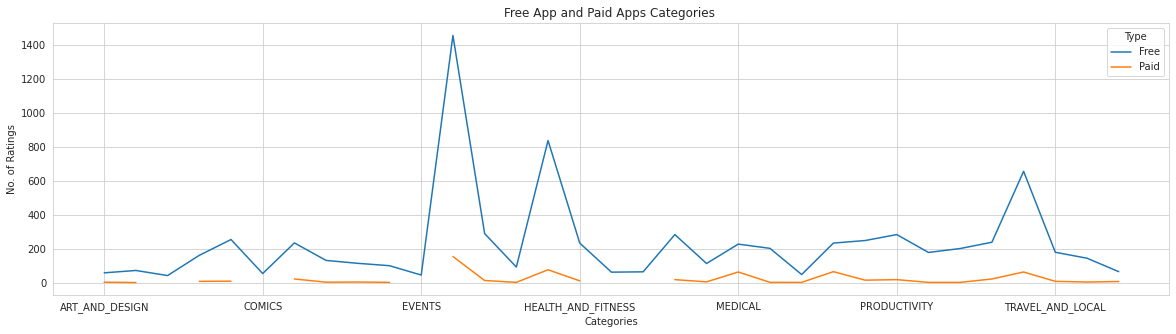

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
Categories_Free_Paid.plot()

plt.title('Free App and Paid Apps Categories ')
plt.ylabel('No. of Ratings')
plt.xlabel('Categories')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


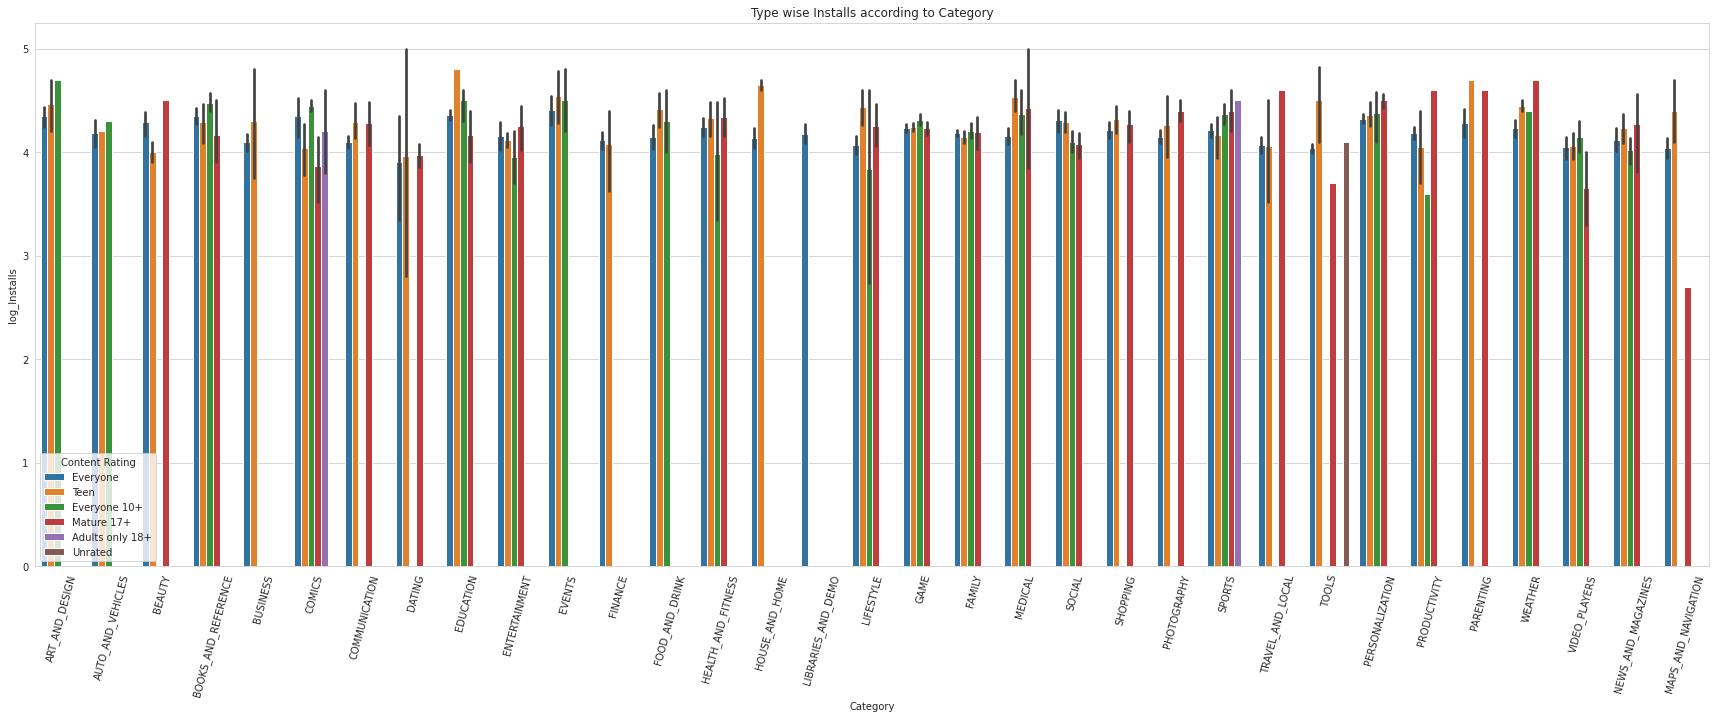

In [267]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=75,fontsize=10)
plt.title("Type wise Installs according to Category")
sns.barplot(df['Category'], df['Rating'], hue=df['Content Rating']);
plt.xlabel("Category")
plt.ylabel("log_Installs")
plt.show()

<b>Applications with Total Ratings 4 and above.

In [ ]:
Number_of_Ratings_for_Categories=df.groupby(["Category",df["Rating"].loc[lambda x : x>4]])["Rating"].count().unstack()
Number_of_Ratings_for_Categories


In [ ]:
Number_of_Ratings_for_Categories.columns

Float64Index([4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0], dtype='float64', name='Rating')

Text(0.5, 0, 'Categories')

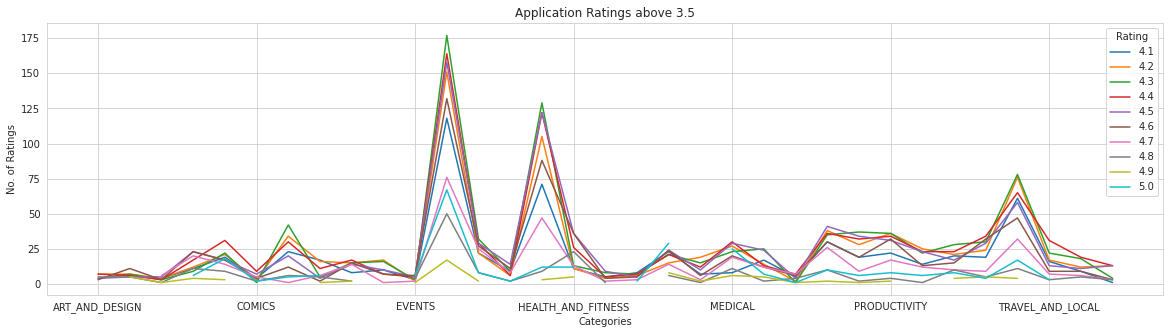

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
Number_of_Ratings_for_Categories.plot()

plt.title('Application Ratings above 3.5')
plt.ylabel('No. of Ratings')
plt.xlabel('Categories')


7.2 Rating vs Size Scatter plot
7.2 Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


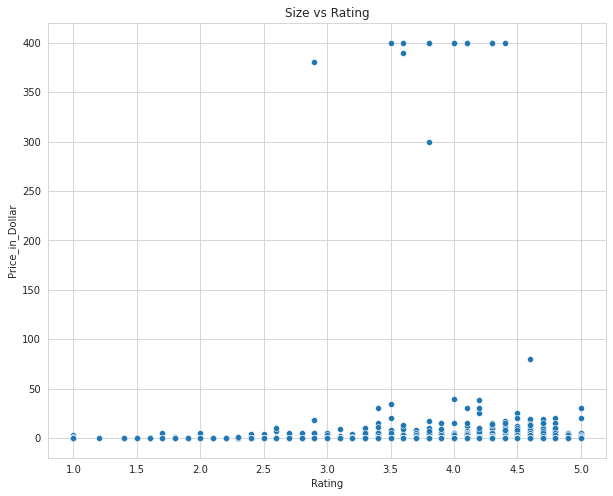

In [324]:
## scatter plot for 'Rating' and 'Size'

plt.subplots(figsize=(10,8));
sns.scatterplot(df["Rating"],df["Price_in_Dollar"],data=df)
plt.title('Size vs Rating')
plt.grid(linestyle='-')
plt.show()


In [ ]:
df.Rating.loc[lambda x:x>4.5].value_counts()

4.6    683
4.7    442
5.0    271
4.8    221
4.9     85
Name: Rating, dtype: int64

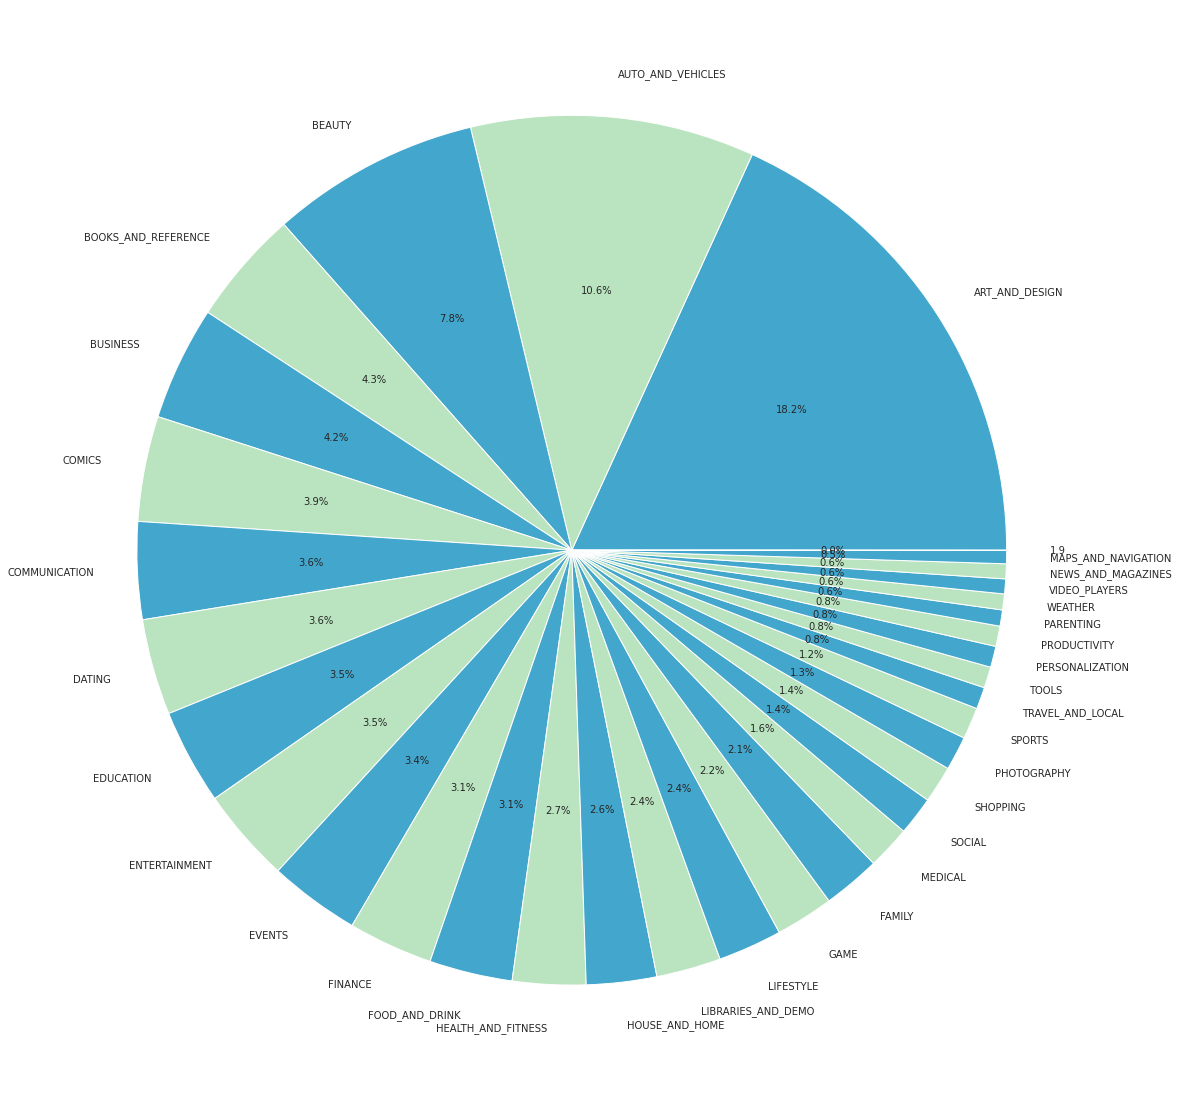

In [271]:
plt.rcParams['figure.figsize']=(20,20)
size = store_df["Category"].value_counts()
size = store_df["Category"].value_counts()
labels = store_df["Category"].unique()
colors=["#43a6cc", "#bae4bf"]

plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

app size

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


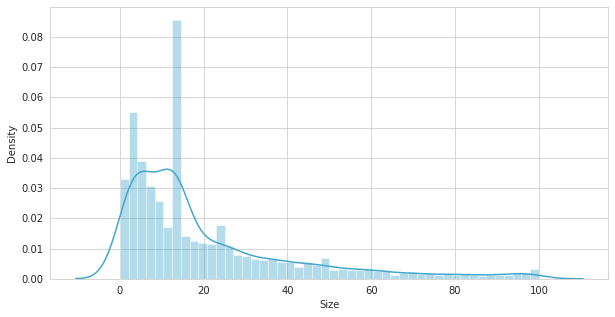

In [272]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(df["Size"], color="#43a6cc")

What size should my app be

#Sentiment Analysis

<b>Before Diving Deep into this dataFrame lets have a brief idea about the terms sentiments,Sentiment_Polarity,Sentiment_Subjectivity. and why are they used in User Reviews on playstore App</b>
Its a Basic human tendency to  make a judgement or have a opinion about anything in there surrounding or anything within their range of contact.And these opinion may differ for different humans.but opinions may intersect for particular thing at a with some level of undestanding ,requirementsand availability.and this intersecting tendencies result into likes and dislikes.for example Python has able to become to much powerfull today because it is more easy to understant, there is a requirement for programming in this digital age and it is available for free of cost. hence it has able todevelop a positive sentiment in the minds of programmers.

Then what about neutral sentiment suppose a programmer is confirtable with other languages too then for him/her python will be like other languages.

what is negative sentiments then suppose a person who is new to coding and he/she is thrown with complex jargons from python and directly put into machine learning and NLP. it would creat a negative opion about programming and python.

That great
now wathat is sentiment polarity. it is basically a part of nlp in which we use the words from user to predict his/her sentiments like best ok worst bad poor dontlke it messi  good very goog Great Brilliant Excellent etc we can measure the sentiments.
Now question arises what it is doing in our data set.
so 
our data set is about the review of playstore application how much people like or dislike an app will is taken from total no. ratings given by user number of installion, sentiment of peoples toward that app and on compatability with latest version of handsets(latest update).
for example people of all age love to listen music hence spotify has develoed an app for listening music now listeners will install it use it loved the function and featurs rated the app with maximum stars. other people visit app store they look for apps with maximum stars (Rating) and install it. the number of installation increases hence the search engine optimiser pull the spotify at top.number of users increases directly propostional to happiness of app developers.

In [274]:
# Merge second dataframe(Play store app Review)  with first DataFrame(Play store app data) useing inner join.
mergedf = pd.merge(df, df1, on='App', how = 'inner')
mergedf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price_in_Dollar,Genres,Content Rating,Last Updated,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Art & Design;Pretend Play,Everyone,2018-01-15,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Art & Design;Pretend Play,Everyone,2018-01-15,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Art & Design;Pretend Play,Everyone,2018-01-15,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Art & Design;Pretend Play,Everyone,2018-01-15,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Art & Design;Pretend Play,Everyone,2018-01-15,Negative,-0.800,0.900000


In [275]:
Detailed_info(mergedf)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,816,0,35934
Category,object,33,0,35934
Rating,float64,22,0,35934
Reviews,int64,807,0,35934
Size,float64,166,0,35934
Installs,int64,12,0,35934
Type,object,2,0,35934
Price_in_Dollar,float64,9,0,35934
Genres,object,67,0,35934
Content Rating,object,5,0,35934


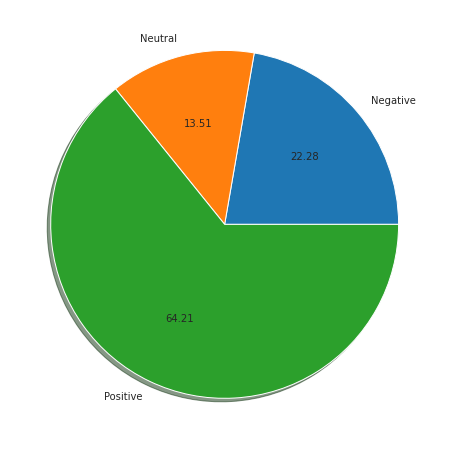

In [277]:
# Visualize the composition through a pie chart
fig,ax1 = plt.subplots(figsize=(12,8))
sentiments = mergedf.groupby('Sentiment').size()
plt.pie(sentiments,labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f')
plt.show()

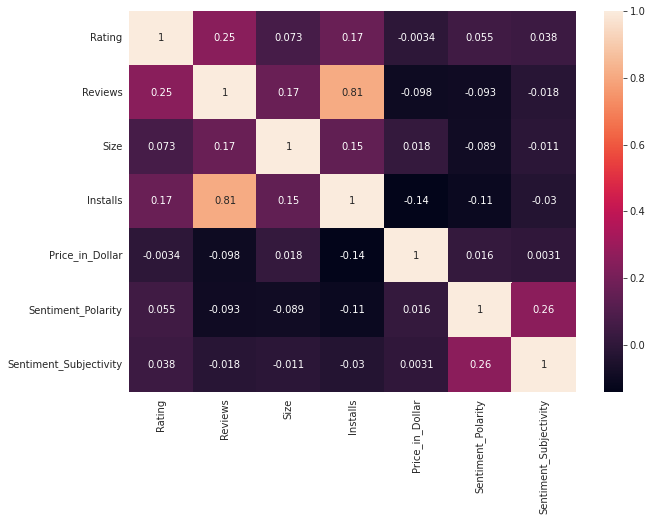

In [286]:
df.corr(method ='kendall')
plt.figure(figsize = (10,7))
sns.heatmap(mergedf.corr(method ='kendall'), annot= True)

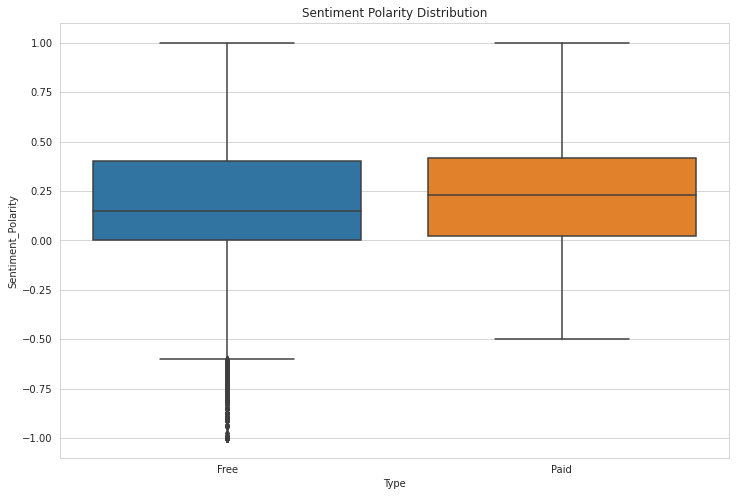

In [276]:
# Visualize the Sentiment Polarity Distribution for Free and Paid apps
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = mergedf)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

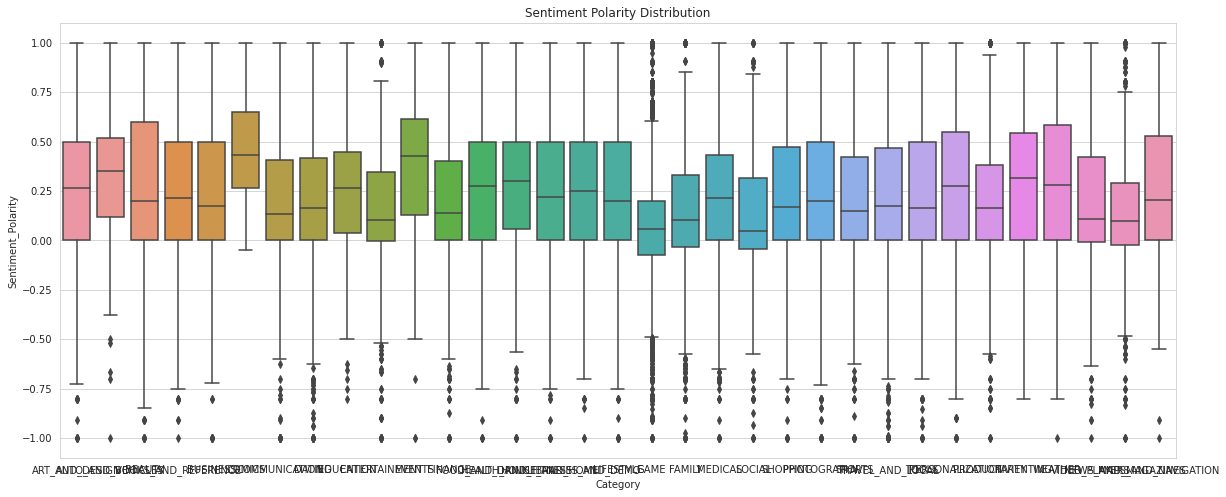

In [287]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax = sns.boxplot(x = 'Category', y = 'Sentiment_Polarity', data = mergedf)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

Conclusion
Hence, from the above observations and visualizations, we can draw the following conclusions:

The most popular App Category is "Game".

A large number of Apps fall into "Family" Category i.e., this is the category with highest number of subsequent apps.

The total average rating of Play Store Apps is [4.18].

The App Categories with least and highest average ratings are "Dating" and "Events" respectively.

Free apps are highly popular when compared to Paid apps.

Most of the apps receive Positive reviews i.e., about 63.5%. Free apps might have a broader range of reviews than Paid apps but the median of Sentiment Polarity is higher in Paid apps.